<h1 style="font-size:3rem;color:orange;">Predection using supervised ML<h1>

# Importing all libraries required 

In [609]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
print("Modules imported successfully ")


Modules imported successfully 


#  Importing the data from CSV file

In [610]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Data imported successfully ")
dataset.head()

Data imported successfully 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exporing the dataset

In [611]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [612]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [613]:
dataset.shape

(25, 2)

In [614]:
print("Number of dublicate rows :" ,dataset.duplicated().sum())

Number of dublicate rows : 0


# Plotting data points on 2D graph

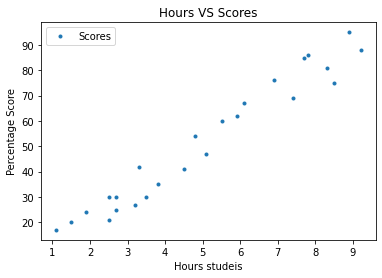

In [615]:
dataset.plot(x='Hours',y='Scores',style= '.')
plt.title('Hours VS Scores')
plt.xlabel('Hours studeis')
plt.ylabel('Percentage Score')
plt.show()


# preparing the data

In [616]:
X = dataset["Hours"].values.reshape(-1, 1)
y = dataset["Scores"].values
print("shape of x : ", X.shape)
print("shape of y: ", y.shape)



shape of x :  (25, 1)
shape of y:  (25,)


# Split the data into training data and test data sets using Scikit-Learn's train_test_split() method:

In [617]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Splitting the data into training and testing sets is done ")

Splitting the data into training and testing sets is done 


# Applying Linear regression model using Scikit-Learn

In [618]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test).reshape(-1,1)
print("Fitting the linear regression model is done ")

Fitting the linear regression model is done 


# Calculating R-Squared and the square root of the mean squared error : RMSE

In [619]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
r_squared = reg.score(X_test, y_test) 
print("R-Squared = ",r_squared )
print("RMSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("Mean Absolute error :" ,mean_absolute_error(y_test, y_pred) )


R-Squared =  0.9678055545167994
RMSE =  4.352380006653288
Mean Absolute error : 3.9207511902099244


# Applying cross validation using scikit-learn to evaluate the models performance

In [620]:
from sklearn.model_selection import cross_val_score,KFold

kf = KFold(n_splits=4, shuffle=True, random_state=42)
cv_results = cross_val_score(reg, X, y, cv=kf)
mean_r_squared =  np.mean(cv_results)
print("cross validation is done ")
print("R-Squared from the cross validation :", mean_r_squared)
print("Standard deviation is :", np.std(cv_results))
print("the 95% confidence interval : ", np.quantile(cv_results,[0.025,0.975]))

cross validation is done 
R-Squared from the cross validation : 0.9351805772795736
Standard deviation is : 0.02100706287446326
the 95% confidence interval :  [0.90305062 0.95454346]


# Model performance 

In [621]:
print("Model Performance is equal to :", abs(r_squared+mean_r_squared)/2*100 , "%")

Model Performance is equal to : 95.14930658981865 %


In [622]:
# Regression Line equation 
line_equation = reg.coef_ * X + reg.intercept_

# Plotting the regression line

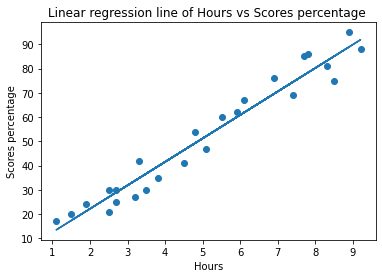

In [623]:
plt.figure()
plt.scatter(X,y)
plt.title("Linear regression line of Hours vs Scores percentage ")
plt.xlabel("Hours")
plt.ylabel("Scores percentage")
plt.plot(X, line_equation)
plt.show()

# What will be predicted score if a student studies 9.25 hour/day?

In [624]:
hours = 9.25
predict_score = reg.predict([[hours]])
print("Score percentage may be : ", predict_score[0], "%")

Score percentage may be :  92.38611528261494 %
